# Práctica guiada: Clustering no supervisado con K-means (enfoque profesional)


> **Módulo:** Programación de Inteligencia Artificial
>
> **Bloque:** Aprendizaje no supervisado – Clustering
>
> **Algoritmo:** K-means
>
> **Tipo:** Práctica guiada con código incompleto

---

## Resultados de aprendizaje trabajados

RA2 – Desarrolla aplicaciones de IA utilizando entornos de modelado.

### Criterios de evaluación asociados:

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados


---

## 1. ¿Qué es el clustering?

El **clustering** (o *agrupación*) es una técnica de **aprendizaje no supervisado** cuyo objetivo es **agrupar instancias de datos en conjuntos (clústeres) de forma que los elementos dentro de un mismo grupo sean más similares entre sí que con los de otros grupos**.

El clustering se utiliza en múltiples aplicaciones reales, entre ellas:

* **Búsqueda de similitud de imágenes**: se agrupan imágenes según sus características y, cuando el usuario aporta una nueva imagen, se asigna al clúster más cercano para devolver las *N* imágenes más similares.
* **Segmentación de imágenes**: se agrupan píxeles según su color u otras características y se reemplazan por el valor medio de su clúster, simplificando la imagen.
* **Análisis exploratorio de datos**: permite descubrir patrones y estructuras internas en los datos y analizar cada grupo por separado.
* **Reducción de dimensionalidad**: las características originales pueden sustituirse por la pertenencia o afinidad de cada instancia a los distintos clústeres.
* **Detección de anomalías**: las instancias que no encajan bien en ningún clúster suelen corresponder a valores atípicos.
* **Aprendizaje semisupervisado**: cuando solo se dispone de unas pocas etiquetas, el clustering puede ayudar a propagar esas etiquetas dentro de cada grupo.

Existen **distintos tipos de algoritmos de clustering** y **no hay una definición única de lo que constituye un clúster**, ya que depende del criterio de similitud y del objetivo del análisis.

En este cuaderno se trabajará con **K-means**, uno de los algoritmos de clustering más utilizados por su simplicidad, eficiencia y facilidad de interpretación.



### 2. K-means

El algoritmo **K-means** es un método de *clustering no supervisado* que divide un conjunto de **N muestras** $X = \{x_1, x_2, \dots, x_N\} $ **en K grupos** $($ C = \{C_1, C_2, \dots, C_K\} $.

Cada grupo está representado por un **centroide** $\mu_j $, que corresponde a la **media de las muestras asignadas a ese clúster**. Los centroides **no suelen coincidir con puntos reales del conjunto de datos**, aunque se encuentran en el mismo espacio de características.

El objetivo de K-means es encontrar los centroides que **minimizan la inercia**, definida como la suma de las distancias cuadráticas entre cada punto y el centroide del clúster al que pertenece:

$
\sum_{i=1}^{N} \min_{1 \le j \le K} \left| x_i - \mu_j \right|^2
$

La **inercia** (también llamada *función de distorsión*) es una **métrica interna del modelo** que mide qué tan compactos son los clústeres. Cuanto menor es su valor, más próximos están los puntos a sus respectivos centroides.
Su cálculo consiste en:

1. Medir la distancia entre cada punto y su centroide.
2. Elevar dicha distancia al cuadrado.
3. Sumar todos los valores obtenidos.

En la práctica, los centroides pueden encontrarse en dos situaciones:

* **Centroides conocidos**: si se conocen previamente, cada instancia se puede asignar directamente al clúster cuyo centroide esté más cercano. De forma equivalente, si se dispone de un conjunto de datos ya etiquetado, los centroides pueden calcularse como la media de los puntos de cada grupo.
* **Centroides desconocidos** (caso habitual): no se dispone ni de etiquetas ni de centroides iniciales. En este caso, K-means comienza con centroides iniciales (normalmente aleatorios) y **repite de forma iterativa** los siguientes pasos hasta que el modelo converge:

  1. Asignar cada punto al centroide más cercano.
  2. Recalcular los centroides como la media de los puntos asignados a cada clúster.

Este proceso continúa hasta que los centroides dejan de cambiar o el cambio es insignificante.





### 3. ¿Cómo funciona el algoritmo?

El algoritmo de clustering **K-means** suele partir de **centroides desconocidos** y utiliza un **proceso iterativo** para obtener el resultado final.
Las entradas del algoritmo son:

* El número de clústeres **K**
* El conjunto de datos, formado por las características de cada punto

El algoritmo comienza con una **estimación inicial de los K centroides**, que pueden generarse de forma aleatoria o seleccionarse a partir del propio conjunto de datos. A partir de ahí, K-means itera entre los siguientes dos pasos:

---

### 1. Paso de asignación

Cada centroide define un clúster. En este paso, **cada punto de datos se asigna al centroide más cercano**, normalmente utilizando la **distancia euclídea al cuadrado**.

De forma más formal, sea $ C = \{c_1, c_2, \dots, c_K\} $ el conjunto de centroides.
Cada punto $ x $ se asigna al clúster cuyo centroide minimiza la distancia:

$
\arg\min_{c_i \in C} ; |x - c_i|^2
$

Denotamos por $ S_i $ el **conjunto de puntos asignados al clúster i-ésimo**.

---

### 2. Paso de actualización del centroide

Una vez asignados los puntos, se recalculan los centroides.
Cada centroide se actualiza como la **media de todos los puntos asignados a su clúster**:

$
c_i = \frac{1}{|S_i|} \sum_{x \in S_i} x
$

---

El algoritmo repite de forma alterna los pasos de asignación y actualización hasta que se cumple un **criterio de parada**, por ejemplo:

* Ningún punto cambia de clúster entre iteraciones
* El cambio en la inercia es insignificante
* Se alcanza un número máximo de iteraciones

Este proceso **garantiza la convergencia**, aunque no necesariamente hacia el óptimo global, ya que el resultado depende de la inicialización de los centroides.

---



---

## 4. Convergencia e inicialización aleatoria

El algoritmo **K-means está garantizado para converger**, es decir, el proceso iterativo siempre finaliza tras un número finito de pasos.

Sin embargo, la convergencia **no garantiza que se alcance el óptimo global**. Dependiendo de la **inicialización de los centroides**, el algoritmo puede converger a **óptimos locales**, que corresponden a soluciones subóptimas en términos de inercia.

Por este motivo, ejecutar K-means **una sola vez** puede no ser suficiente. En la práctica, se realizan **varias ejecuciones con diferentes centroides iniciales aleatorios**, seleccionando finalmente la solución con menor inercia.

Esta es la razón por la que muchas implementaciones modernas de K-means (como en *scikit-learn*) repiten automáticamente el algoritmo varias veces (`n_init`) y devuelven el mejor resultado obtenido.

<div style="text-align:center">
    <img style="width:50%" src="img/K-means_convergence.gif">
</div>



---


## A) Ejemplo guiado (dataset sintético)


En esta ejemplo vas a ver como **aplicar K-means siguiendo un flujo de trabajo realista**, similar al que se utiliza hoy en día en proyectos de Machine Learning.


No se trata solo de ejecutar el algoritmo, sino de:


- Preparar correctamente los datos
- Elegir razonadamente el número de clusters
- Interpretar los resultados obtenidos
- Validar la estabilidad del clustering




## 1. Importación de librerías


Comienza importando las librerías necesarias para trabajar con datos, visualización y clustering.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score
)
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

## 2. Creación del dataset


Para centrarnos en el algoritmo, utilizaremos un **dataset sintético**, al que añadiremos ruido y valores atípicos.


Completa el siguiente código para generar los datos:

In [105]:
# generar un dataset con make_blobs
X, y_true = make_blobs(
    n_samples=1500,
    centers=4,
    cluster_std=[1.0, 2.5, 0.8, 1.5],
    random_state=42
)

df = pd.DataFrame(X, columns=["feature_1", "feature_2"])


# convertir el array en un DataFrame con dos columnas
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])


Añade ahora algunos **outliers artificiales**:

In [106]:
# generar puntos aleatorios como outliers

rng = np.random.default_rng(42)
outliers = rng.uniform(low=-10, high=10, size=(30, 2))
# añadirlos al DataFrame original
df = pd.concat([df, pd.DataFrame(outliers, columns=df.columns)], ignore_index=True)

---


## 3. Análisis exploratorio inicial


Antes de aplicar cualquier algoritmo, **visualizamos los datos**.

Ahora entrenaremos el algoritmo de clustering K-means sobre este dataset:

,feature_1,feature_2
count,1530.000000,1530.000000
mean,-3.245058,2.880968
std,5.537487,6.388377
min,-12.959585,-9.852755
25%,-7.561924,-4.630395
50%,-4.540831,5.417917
75%,0.731349,8.326387
max,11.040090,13.212879


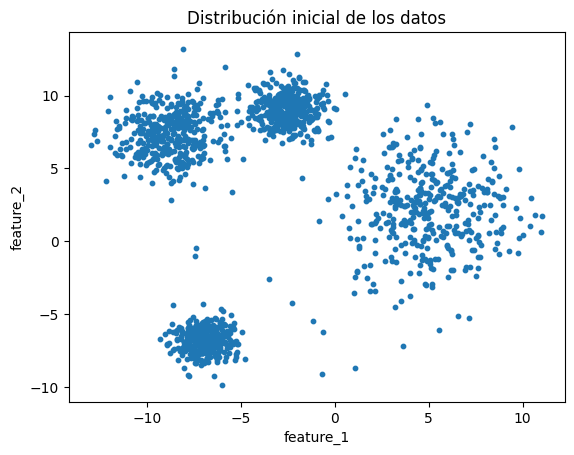

In [107]:
#  mostrar estadísticas básicas del DataFrame
display(df.describe())



# realizar un scatter plot de las dos variables
plt.scatter(df["feature_1"], df["feature_2"], s=10)
plt.title("Distribución inicial de los datos")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

 ¿Detectas visualmente posibles grupos?

 Si.

 ¿Se aprecian valores atípicos?

 Si, ya que se ven alejados de los posibles grupos.

<br>

---


## 4. Preprocesado de los datos


K-means es muy sensible a la escala de las variables. Por ello:


- Aplicaremos **escalado**
- Usaremos `RobustScaler` en vez de StandardScaler (z-score) para reducir el impacto de **outliers**


Completa el pipeline de preprocesado:

In [108]:
# crear un Pipeline con RobustScaler
preprocess = Pipeline([
    ("scaler", RobustScaler())
])


#  ajustar y transformar el DataFrame
X_scaled = preprocess.fit_transform(df)


---


## 5. Selección del número de clusters


No existe un único criterio para elegir el valor de **K**. En esta práctica compararás varias métricas:


- Inercia (Elbow)
- Silhouette score
- Calinski–Harabasz
- Davies–Bouldin


Completa el siguiente bucle:

In [109]:
# Definimos el rango de valores de k (número de clusters) a evaluar: de 2 a 10
# Se empieza en 2 porque muchas métricas no están definidas para k = 1
K_RANGE = range(2, 11)

# Listas para almacenar las métricas obtenidas para cada valor de k
inertias = []      # Inercia del modelo (método del codo)
silhouettes = []  # Coeficiente silhouette
calinski = []     # Índice de Calinski-Harabasz
davies = []       # Índice de Davies-Bouldin

# Iteramos sobre cada valor de k
for k in K_RANGE:
    # Creamos el modelo KMeans con k clusters
    # n_init="auto" selecciona automáticamente el número de inicializaciones
    # random_state fija la semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)

    # Ajustamos el modelo a los datos escalados y obtenemos las etiquetas
    # de cluster para cada observación
    labels_k = kmeans.fit_predict(X_scaled)

    # Guardamos la inercia (suma de las distancias cuadradas a los centroides)
    inertias.append(kmeans.inertia_)

    # Calculamos y almacenamos el coeficiente silhouette,
    # que mide la cohesión interna y separación entre clusters
    silhouettes.append(silhouette_score(X_scaled, labels_k))

    # Calculamos y almacenamos el índice de Calinski-Harabasz,
    # que relaciona la dispersión entre clusters con la dispersión interna
    calinski.append(calinski_harabasz_score(X_scaled, labels_k))

    # Calculamos y almacenamos el índice de Davies-Bouldin,
    # que evalúa la similitud entre clusters (valores menores son mejores)
    davies.append(davies_bouldin_score(X_scaled, labels_k))


---


## 6. Visualización de métricas


Representa gráficamente las métricas calculadas para ayudarte a decidir el valor de K.

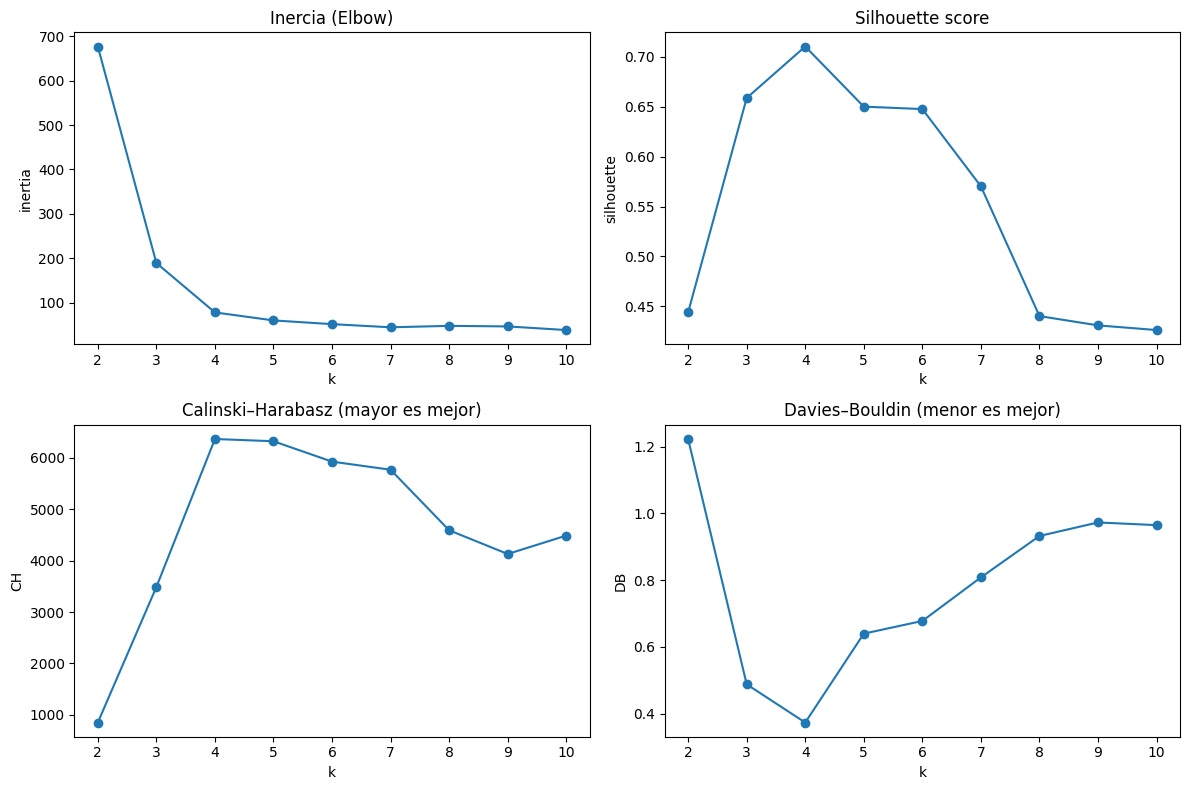

In [110]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Inercia (Elbow)")
plt.xlabel("k")
plt.ylabel("inertia")

plt.subplot(2, 2, 2)
plt.plot(list(K_RANGE), silhouettes, marker="o")
plt.title("Silhouette score")
plt.xlabel("k")
plt.ylabel("silhouette")

plt.subplot(2, 2, 3)
plt.plot(list(K_RANGE), calinski, marker="o")
plt.title("Calinski–Harabasz (mayor es mejor)")
plt.xlabel("k")
plt.ylabel("CH")

plt.subplot(2, 2, 4)
plt.plot(list(K_RANGE), davies, marker="o")
plt.title("Davies–Bouldin (menor es mejor)")
plt.xlabel("k")
plt.ylabel("DB")

plt.tight_layout()
plt.show()



<div style="background-color:green;color:white">

<br>

 ❓ **Pregunta**:

¿Todas las métricas sugieren el mismo valor de K?

Si, todas las métricas sugieren k=4

¿Cuál elegirías y por qué?

K=4 porque tenemos varias metricas que consideran que es el mejor valor.

<br>

---

### Silhouette plot

El **coeficiente silhouette** mide qué tan bien está asignada **cada muestra** a su clúster.

* Valores **cercanos a 1** indican que la muestra está bien agrupada y lejos de otros clústeres.
* Valores **cercanos a 0** indican que la muestra está en la frontera entre dos clústeres.
* Valores **negativos** indican que la muestra podría estar mejor asignada a otro clúster.

En un buen clustering **no es necesario que todas las muestras tengan valores cercanos a 1**.
Lo importante es que **la mayoría de las muestras tengan valores positivos** y que haya **pocas muestras mal asignadas**.

El siguiente gráfico permite **analizar la calidad interna de los clústeres** para el valor de **K elegido**, complementando al silhouette medio.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



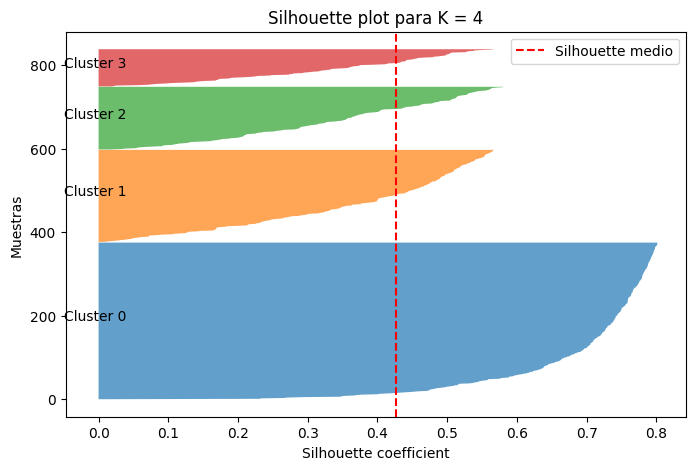

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

labels = kmeans.fit_predict(X_scaled)
K_OPT = 4

# Cálculo del silhouette por muestra
silhouette_vals = silhouette_samples(X_scaled, labels)

fig, ax = plt.subplots(figsize=(8, 5))

y_lower = 0
for i in range(K_OPT):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()

    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster, f"Cluster {i}")
    y_lower = y_upper

# Línea vertical con el silhouette medio
silhouette_avg = silhouette_score(X_scaled, labels)
ax.axvline(silhouette_avg, color="red", linestyle="--", label="Silhouette medio")

ax.set_title(f"Silhouette plot para K = {K_OPT}")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Muestras")
ax.legend()
plt.show()


---


## 7. Entrenamiento del modelo final


Elige un valor de **K** razonable según el apartado anterior y entrena el modelo definitivo.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [112]:
K_OPT = 4  # (en este dataset suele encajar bien)

kmeans = KMeans(n_clusters=K_OPT, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X_scaled)

df["cluster"] = labels

---


## 8. Interpretación de los clusters


Un clustering **no es útil si no se interpreta**.


Completa el siguiente análisis:

feature_1                           feature_2                      \
             mean    median       std count      mean    median       std   
cluster                                                                     
0       -2.518492 -2.493024  1.090689   390  8.899033  8.956051  1.241520   
1        5.105555  4.942226  2.180218   382  2.106294  2.333708  2.800087   
2       -6.855880 -6.901242  0.998809   384 -6.784408 -6.851230  0.946049   
3       -8.824576 -8.751664  1.404342   374  7.320500  7.252975  1.529536   

               
        count  
cluster        
0         390  
1         382  
2         384  
3         374

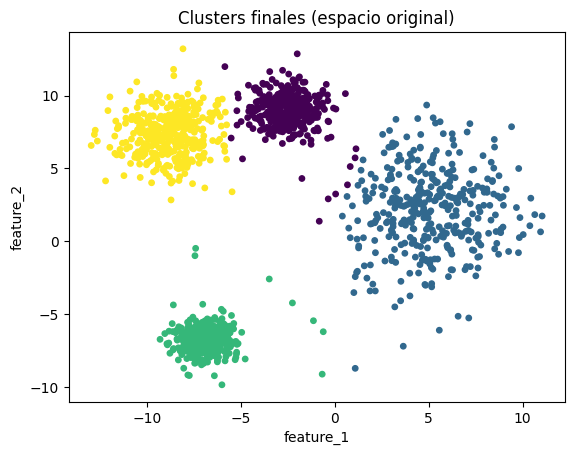

In [113]:
cluster_profile = df.groupby("cluster")[["feature_1", "feature_2"]].agg(["mean", "median", "std", "count"])
display(cluster_profile)

plt.scatter(df["feature_1"], df["feature_2"], c=df["cluster"], s=15)
plt.title("Clusters finales (espacio original)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


<div style="background-color:green;color:white">

<br>

 ❓ **Pregunta**: ¿Qué caracteriza a cada cluster? Describe al menos dos rasgos por grupo.

- Cluster(Verde): Esta muy concentrado, pero se ve que tiene outliers

- Cluster(Azul): Esta muy disperso, abarca mucho espacio entre ambas características lo que podria darnos problemas.

- Cluster(Amarillo):Esta un poco disperso

- Cluster(Morado):Esta muy concentrado

- Cluster(Amarillo y Morado): Estan muy unidos entre si, con fronteras difusas


 <br>

---


## 9. Visualización con PCA


Cuando hay más de dos variables, se suele usar **PCA** para visualizar los clusters.

### 9.1 Añadimos una tercera variable

Añadimos una tercera variable correlacionada con las otras dos.

In [114]:
# Añadimos una tercera variable correlacionada
rng = np.random.default_rng(42)
df["feature_3"] = (
    0.5 * df["feature_1"]
    - 0.3 * df["feature_2"]
    + rng.normal(0, 0.5, size=len(df))
)


### 9.2 Preprocesado

Aplicamos de nuevo escalado

In [115]:
X_scaled = preprocess.fit_transform(df[["feature_1", "feature_2", "feature_3"]])


### 9.2 Interpretación de clusters

Este análisis agrupa los datos por clúster y calcula estadísticas descriptivas para cada uno, permitiendo interpretar qué caracteriza a cada grupo y compararlos entre sí.

In [116]:
cluster_profile = df.groupby("cluster")[[
    "feature_1", "feature_2", "feature_3"
]].agg(["mean", "std", "count"])


### 9.3 Visualización 3D de los clusters

In [117]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="feature_1",
    y="feature_2",
    z="feature_3",
    color="cluster",
    opacity=0.8,
    title="Clusters en el espacio 3D (interactivo)"
)

fig.show()


### 9.4 aplicamos PCA para visualizarlo  en dos dimensiones.

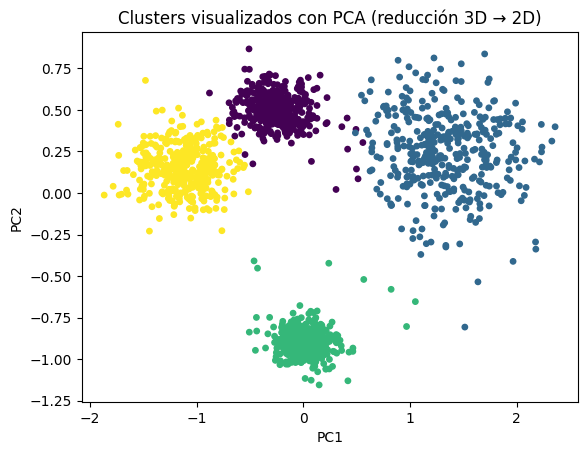

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualizados con PCA (reducción 3D → 2D)")
plt.show()


---


## 10. Estabilidad y reproducibilidad


K-means depende de la inicialización. Es buena práctica comprobar la estabilidad del clustering, es decir, si K-means obtiene los mismos grupos aunque cambie la inicialización.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


Vamos a comprobar si los resultados son estables.

In [119]:
labels_list = []

for seed in range(10):
    km = KMeans(n_clusters=K_OPT, n_init="auto", random_state=seed)
    labels_list.append(km.fit_predict(X_scaled))

# ARI respecto a la ejecución con seed=0
aris = [adjusted_rand_score(labels_list[0], lbl) for lbl in labels_list[1:]]
display(pd.Series(aris, name="ARI_vs_seed0"))



,ARI_vs_seed0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0


Visualizamos la gráfica

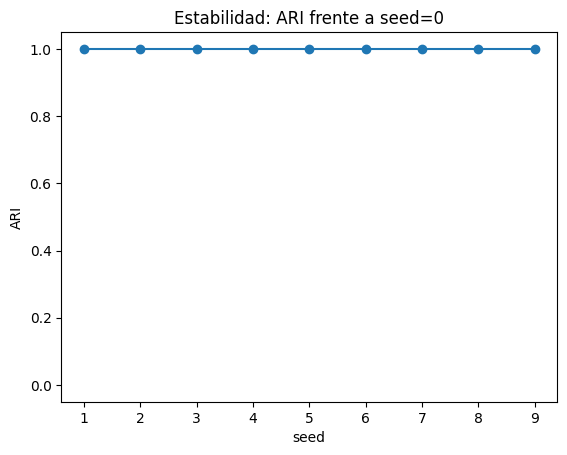

In [120]:
plt.plot(range(1, 10), aris, marker="o")
plt.title("Estabilidad: ARI frente a seed=0")
plt.xlabel("seed")
plt.ylabel("ARI")
plt.ylim(-0.05, 1.05)
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

¿Son estables los clusters?

Si, ya que la estabilidad es la misma aunque cambiemos la semilla

¿Qué indica un ARI alto o bajo?

- Un ARI alto : es una copia exacta
- Un ARI bajo : es al azar

<br>

---

## 11. Escalabilidad: `MiniBatchKMeans`

Cuando el dataset es grande, entrenar `KMeans` clásico puede ser **muy costoso en tiempo y memoria**, ya que en cada iteración calcula la distancia de **todas las muestras** a **todos los centroides**.

Un dataset puede considerarse **grande para K-means** cuando se cumple alguna de estas situaciones:

* Tiene **decenas o cientos de miles de muestras**
* Tiene **muchas variables** (alta dimensionalidad)
* El entrenamiento con `KMeans` tarda varios segundos o minutos
* El consumo de memoria empieza a ser relevante

En estos casos, se utiliza **`MiniBatchKMeans`**, que:

* procesa **pequeños lotes (batches)** de datos en cada iteración
* reduce mucho el tiempo de entrenamiento
* obtiene resultados **muy similares** a `KMeans` clásico

El precio a pagar es una **ligera pérdida de precisión**, que normalmente es aceptable en problemas reales de gran escala.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

En este ejemplo el dataset es pequeño, por lo que `MiniBatchKMeans` se usa **solo con fines demostrativos**, para mostrar cómo se aplicaría el mismo enfoque en un escenario real con grandes volúmenes de datos.

---



In [121]:
# Creamos un modelo MiniBatchKMeans con el número óptimo de clusters (K_OPT)
# batch_size=256 indica cuántas muestras se usan en cada mini-lote,
# lo que acelera el entrenamiento en conjuntos de datos grandes
# random_state fija la semilla para obtener resultados reproducibles
mbk = MiniBatchKMeans(n_clusters=K_OPT, batch_size=256, random_state=42)

# Ajustamos el modelo a los datos escalados y obtenemos
# la etiqueta de cluster asignada a cada observación
labels_mbk = mbk.fit_predict(X_scaled)

# Calculamos el Adjusted Rand Index (ARI) entre:
# - las etiquetas del clustering de referencia (labels, por ejemplo KMeans)
# - las etiquetas obtenidas con MiniBatchKMeans
# El ARI mide la similitud entre ambas particiones, corrigiendo el azar
ari_mbk = adjusted_rand_score(labels, labels_mbk)

# Mostramos el valor del ARI
# Valores cercanos a 1 indican alta concordancia entre ambos clusterings
print("ARI (KMeans vs MiniBatchKMeans):", ari_mbk)


ARI (KMeans vs MiniBatchKMeans): 0.9723261697370246


## 12. Conclusiones

<div style="background-color:green;color:white">

<br>

Redacta brevemente:


- Qué has aprendido sobre K-means

  Los resultados son bastante fiables para detectar patrones, funcionando a la perfección siempre que los grupos sean compactos y estén bien separados.

- Qué pasos son imprescindibles antes de clusterizar

  - Estandarización: Crucial para evitar sesgos derivados de las diferentes escalas de las variables.

  - Tratamiento de outliers: Necesario para impedir que valores extremos desplacen los centroides y distorsionen el modelo.

- Qué limitaciones has detectado

  -  Dificultad para gestionar simultáneamente clusters muy compactos frente a otros muy dispersos.

  - Reducción de la precisión en fronteras difusas donde los límites entre grupos no son claros.

<br>

# B) Segmentación de clientes (Mall_Customers)


> **Tipo:** Ejercicio práctico evaluable

> **Dataset:** `Mall_Customers.csv`

> **Objetivo:** Aplicar K-means a un **problema real de negocio** (segmentación de clientes)


> **Contexto**

> Un centro comercial desea **segmentar a sus clientes** para diseñar campañas de marketing diferenciadas según su comportamiento de gasto y perfil.


### 1. Carga y exploración del dataset

Carga el fichero `Mall_Customers.csv` y realiza un análisis exploratorio inicial.

In [122]:
df_2=pd.read_csv("data/Mall_Customers.csv")
df_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




<div style="background-color:green;color:white">

<br>

- Haz un breve  Análisis Envolvente de Datos  (DEA).

<br>

In [123]:
df_2.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [124]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


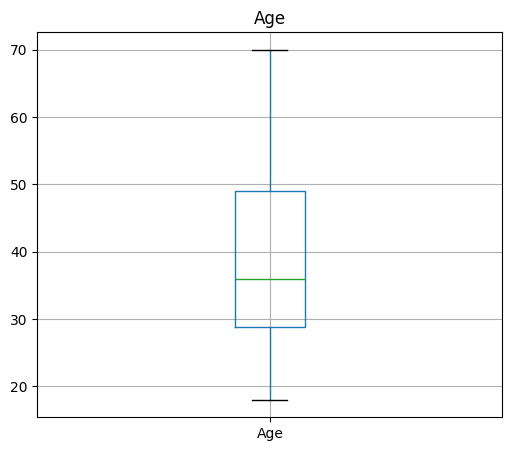

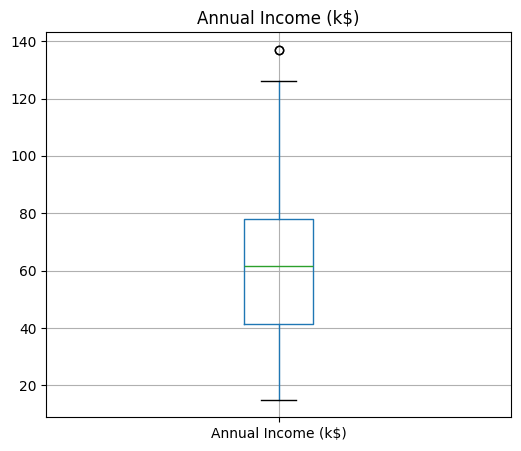

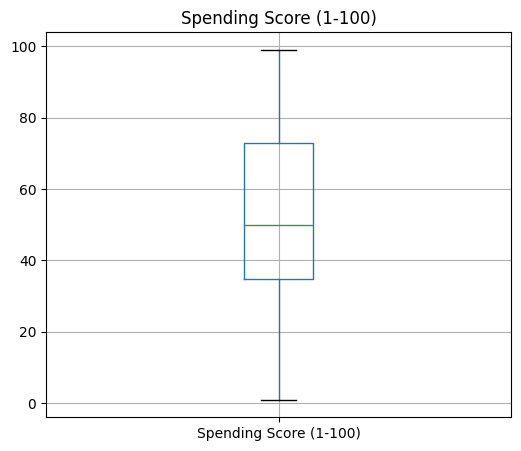

In [125]:
# Boxplot
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for c in cols:
    df_2.boxplot(column=c, figsize=(6, 5))
    plt.title(c)
    plt.show()


<div style="background-color:green;color:white">

Tareas:
<br>
* Identifica qué variables son **numéricas** y cuáles **categóricas**

  Númericas:'CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
  Categoricas: 'Genre'

* Explica brevemente qué representa cada variable

  - CustomerID: Un número de identificación del usuario
  - Genre: Género del usuario
  - Age : Edad del usuario
  - Annual Income (k$) :Ganancias anuales del usuario
  - Spending Score (1-100): Gasto del usuario segun la empresa


* ¿faltan datos?

  No, no hay valores nulos

* ¿Existen outliers?

  Alguno en 'Annual Income'

<br>

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

¿Todas las variables son adecuadas para K-means tal como están?

  No
  - CustomerID no es necesaria ya que es un codigo de identificación y nos alteraría el modelo.
  - Genre es una variable categorica, habría que convertirla a numérica.
  - El resto de variables hay que normalizarlas, para que tengan la misma escala y no afecte al modelo.

<br>

### 2. Selección de variables para el clustering

Para este ejercicio **NO se usarán todas las columnas**.

Selecciona únicamente:

* `Age`
* `Annual Income (k$)`
* `Spending Score (1-100)`

In [126]:
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df_2 = df_2[cols]

---

### 3. Preprocesado

Aplica escalado a los datos.


In [127]:
# Normalizacion
# crear un Pipeline con RobustScaler
preprocess = Pipeline([
    ("scaler", RobustScaler())
])


#  ajustar y transformar el DataFrame
X_scaled = preprocess.fit_transform(df_2)

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

 ¿Qué problema tendría K-means si no se escalan las variables en este dataset?

 Afectaria al modelo al tener un máximo mas alto en 'annual income' y mas pequeño en "age", considerando mas importante el sueldo
<br>

### 4. Elección del número de clusters

Evalúa valores de **K entre 2 y 10** usando al menos:

* Inercia (Elbow)
* Silhouette score


In [128]:
# Definimos el rango de valores de k (número de clusters) a evaluar: de 2 a 10
# Se empieza en 2 porque muchas métricas no están definidas para k = 1
K_RANGE = range(2, 11)

# Listas para almacenar las métricas obtenidas para cada valor de k
inertias = []      # Inercia del modelo (método del codo)
silhouettes = []  # Coeficiente silhouette

# Iteramos sobre cada valor de k
for k in K_RANGE:
    # Creamos el modelo KMeans con k clusters
    # n_init="auto" selecciona automáticamente el número de inicializaciones
    # random_state fija la semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)

    # Ajustamos el modelo a los datos escalados y obtenemos las etiquetas
    # de cluster para cada observación
    labels_k = kmeans.fit_predict(X_scaled)

    # Guardamos la inercia (suma de las distancias cuadradas a los centroides)
    inertias.append(kmeans.inertia_)

    # Calculamos y almacenamos el coeficiente silhouette,
    # que mide la cohesión interna y separación entre clusters
    silhouettes.append(silhouette_score(X_scaled, labels_k))




<div style="background-color:green;color:white">

<br>

* Representa ambas métricas gráficamente.


<br>

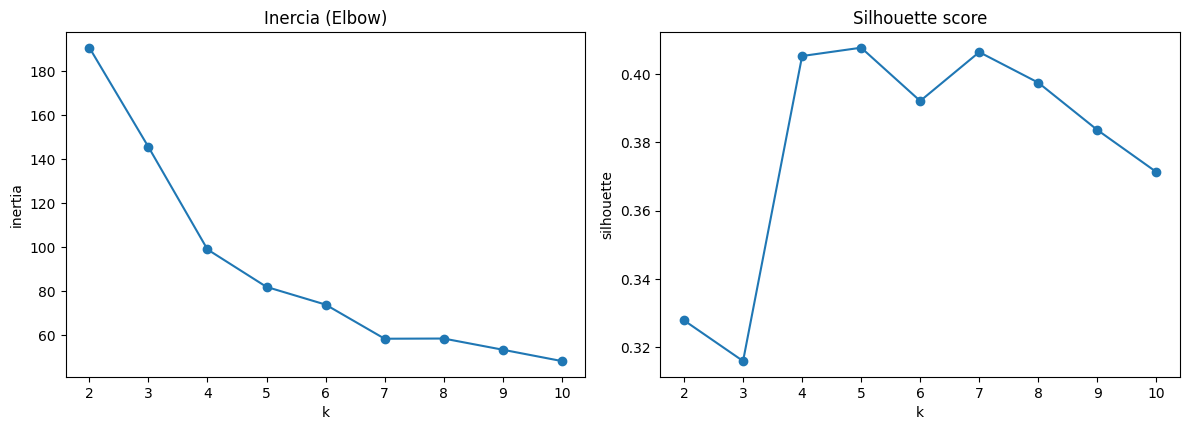

In [129]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Inercia (Elbow)")
plt.xlabel("k")
plt.ylabel("inertia")

plt.subplot(2, 2, 2)
plt.plot(list(K_RANGE), silhouettes, marker="o")
plt.title("Silhouette score")
plt.xlabel("k")
plt.ylabel("silhouette")

plt.tight_layout()
plt.show()


<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

- ¿Qué valor de K elegirías? Justifica la decisión.

  k=5
  - Inercia(Elbow): En k=5 o en k=7 la caida empieza a aplanarse
  - Silhouette: En k=5 o en k=7 es el punto más alto

<br>

### Extra

<div style="background-color:green;color:white">

<br>

- Utiliza otros módelos para evaluar K.

- ¿Coincide con los anteriores?

  No
  - Calinsky: k=7
  - Davies: k=9

<br>

In [130]:
# Definimos el rango de valores de k (número de clusters) a evaluar: de 2 a 10
# Se empieza en 2 porque muchas métricas no están definidas para k = 1
K_RANGE = range(2, 11)

# Listas para almacenar las métricas obtenidas para cada valor de k
calinski = []     # Índice de Calinski-Harabasz
davies = []       # Índice de Davies-Bouldin

# Iteramos sobre cada valor de k
for k in K_RANGE:
    # Creamos el modelo KMeans con k clusters
    # n_init="auto" selecciona automáticamente el número de inicializaciones
    # random_state fija la semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)

    # Ajustamos el modelo a los datos escalados y obtenemos las etiquetas
    # de cluster para cada observación
    labels_k = kmeans.fit_predict(X_scaled)

    # Calculamos y almacenamos el índice de Calinski-Harabasz,
    # que relaciona la dispersión entre clusters con la dispersión interna
    calinski.append(calinski_harabasz_score(X_scaled, labels_k))

    # Calculamos y almacenamos el índice de Davies-Bouldin,
    # que evalúa la similitud entre clusters (valores menores son mejores)
    davies.append(davies_bouldin_score(X_scaled, labels_k))


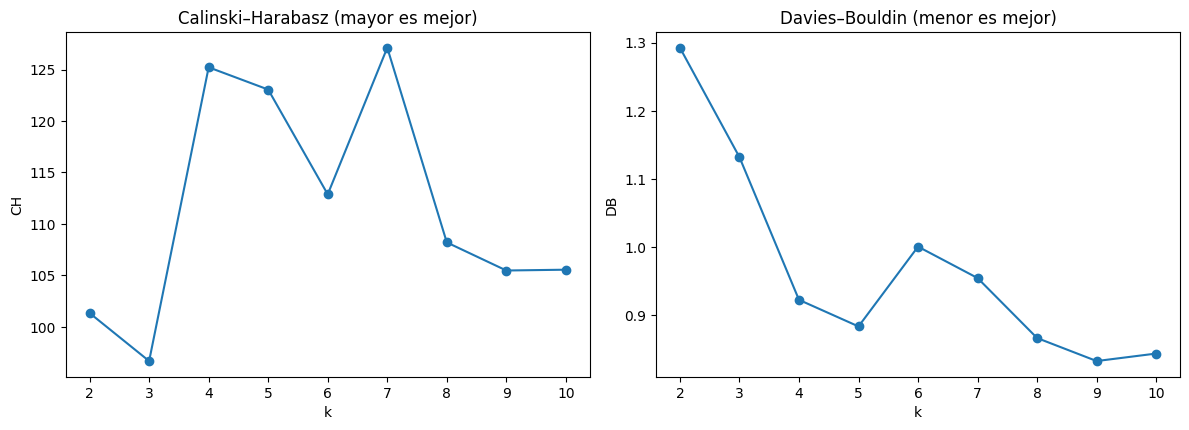

In [131]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
plt.plot(list(K_RANGE), calinski, marker="o")
plt.title("Calinski–Harabasz (mayor es mejor)")
plt.xlabel("k")
plt.ylabel("CH")

plt.subplot(2, 2, 4)
plt.plot(list(K_RANGE), davies, marker="o")
plt.title("Davies–Bouldin (menor es mejor)")
plt.xlabel("k")
plt.ylabel("DB")

plt.tight_layout()
plt.show()

### Entrenamiento


<div style="background-color:green;color:white">

<br>

Entrena el **modelo definitivo de K-means** utilizando el valor de **K seleccionado en el análisis previo**.

1. Entrena el modelo K-means con dicho valor de K y obtén las etiquetas de clúster para cada muestra.

2. Comprueba que el número de clústeres generados coincide con el valor de K seleccionado.

<br>


In [151]:
k=5

kmeans_1 = KMeans(n_clusters=k, n_init="auto", random_state=42)


---


## 6. Interpretación de los clusters

Hasta este punto hemos entrenado el modelo de clustering y asignado a cada muestra un clúster.
Sin embargo, **el resultado del algoritmo son solo etiquetas numéricas** (`0`, `1`, `2`, …), que **no tienen significado por sí mismas**.

En este apartado se analizarán los clústeres obtenidos para **entender qué caracteriza a cada grupo** y **en qué se diferencian entre sí**. Para ello se agruparán los datos por clúster y se calcularán **estadísticas descriptivas** de las variables originales, como la media, la dispersión y el tamaño de cada grupo.

Este análisis permite:

* comprobar si los clústeres tienen perfiles claros y diferenciados
* detectar clústeres muy pequeños, muy dispersos o poco relevantes
* relacionar los resultados del clustering con el problema original

La interpretación es un paso imprescindible, ya que **un clustering solo es útil si puede explicarse y utilizarse para tomar decisiones**.


<div style="background-color:green;color:white">



<br>

 * Añade la columna cluster al DataFrame


<br>

In [152]:
label_5 = kmeans_1.fit_predict(X_scaled)
df_2["cluster"] = label_5


<div style="background-color:green;color:white">

<br>

* Analiza los clusters obtenidos agrupando a los clientes por clúster en un nuevo dataframe y calculando la media de las variables principales (Age, Annual Income y Spending Score) para cada grupo


<br>

In [153]:
cluster_profile = df_2.groupby("cluster")[
    ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
].agg(["mean", "std", "count"])
display(cluster_profile)

Age                 Annual Income (k$)                   \
              mean       std count               mean        std count   
cluster                                                                  
0        55.275862  8.571256    58          47.620690  13.413567    58   
1        32.692308  3.728650    39          86.538462  16.312485    39   
2        25.480000  5.339476    25          25.480000   8.083522    25   
3        27.148936  7.247125    47          54.361702  16.057540    47   
4        44.387097  8.232770    31          89.774194  16.754521    31   

        Spending Score (1-100)                   
                          mean        std count  
cluster                                          
0                    41.706897  15.697814    58  
1                    82.128205   9.364489    39  
2                    75.440000  15.066740    25  
3                    41.680851  16.350916    47  
4                    18.483871  10.194348    31

<div style="background-color:green;color:white">

<br>

* Describe **cada cluster como un perfil de cliente**
* Asigna una etiqueta comprensible (ej. *clientes jóvenes con alto gasto*)

<br>

In [160]:
# Definimos los nombres basados en las medias que has obtenido
nombres_clusters = {
    0: "Senior Moderado",     # 55 años, Gasto medio
    1: "VIP",           # 33 años, Gasto alto, Ingresos altos
    2: "Joven Impulsivo",     # 25 años, Gasto alto, Ingresos bajos
    3: "Joven Promedio",      # 27 años, Gasto medio
    4: "Rico Ahorrador"       # 44 años, Gasto bajo, Ingresos altos
}

# Creamos la columna nueva
df_2["perfil_cliente"] = df_2["cluster"].map(nombres_clusters)

# Verificamos que se haya creado bien mostrando 5 filas aleatorias
display(df_2.sample(5))

,Age,Annual Income (k$),Spending Score (1-100),cluster,perfil_cliente
52,31,43,54,3,Joven Promedio
89,50,58,46,0,Senior Moderado
20,35,24,35,3,Joven Promedio
105,21,62,42,3,Joven Promedio
111,19,63,54,3,Joven Promedio


<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

* ¿Cómo usaría el departamento de marketing estos resultados?

  - Cluster 1 (VIP): Fidelizar con recompensas exclusivas y trato premium.

  - Cluster 4 (Rico Ahorrador): Activar ofreciendo productos de lujo o alta gama.

  - Cluster 2 (Joven Impulsivo): Atraer mediante Redes Sociales y tendencias de moda.

  - Cluster 3 (Joven Promedio): Rentabilizar con ofertas "calidad-precio".

  - Cluster 0 (Senior): Mantener con marketing tradicional y catálogos físicos.
  
<br>

---

### 7. Visualización

<div style="background-color:green;color:white">

<br>

Representa los clusters:

* En 2D usando *Annual Income* vs *Spending Score*

<br>


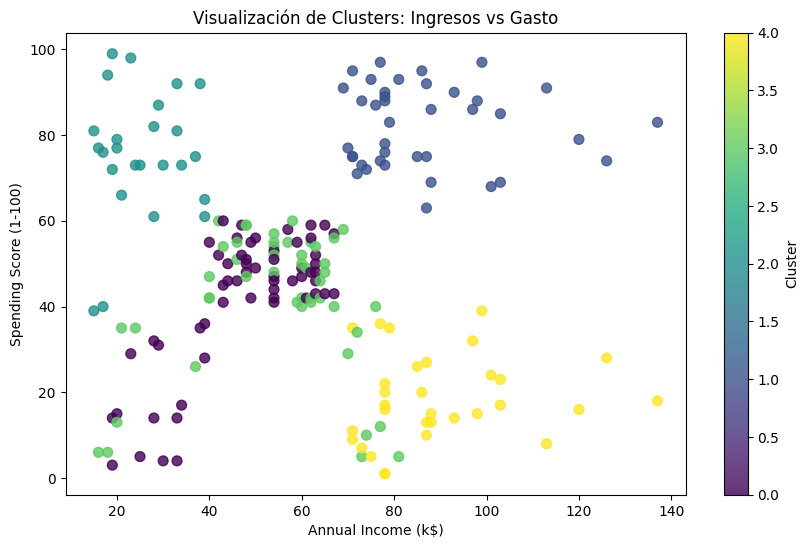

In [161]:
plt.figure(figsize=(10, 6))

# Creamos el gráfico de dispersión (Scatter Plot) usando el dataframe correcto df_2
scatter = plt.scatter(
    df_2["Annual Income (k$)"],
    df_2["Spending Score (1-100)"],
    c=df_2["cluster"],
    cmap="viridis",
    s=50,
    alpha=0.8
)

# Añadimos títulos y etiquetas
plt.title("Visualización de Clusters: Ingresos vs Gasto")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Barra de color para identificar los grupos
plt.colorbar(scatter, label="Cluster")
plt.show()

### Tarea extra (opcional) · Visualización 3D interactiva de los clústeres

En este apartado vas a crear una visualización en **3D** para observar los clústeres desde distintos ángulos. El objetivo es **comprobar visualmente** si los grupos están bien separados cuando se consideran **Age, Income y Spending Score a la vez**.

1. Crea un gráfico 3D **interactivo** donde:

   * Eje X: `Age`
   * Eje Y: `Annual Income (k$)`
   * Eje Z: `Spending Score (1-100)`
   * Color: `cluster`

2. Comprueba que el gráfico **se puede rotar, hacer zoom y desplazar** con el ratón.

3. Responde brevemente:





In [163]:
import plotly.express as px

# Creamos el gráfico 3D interactivo
fig = px.scatter_3d(
    df_2,
    x="Age",
    y="Annual Income (k$)",
    z="Spending Score (1-100)",
    color="perfil_cliente",     # Usamos las etiquetas creadas antes (o 'cluster' si prefieres números)
    title="Análisis 3D: Edad vs Ingresos vs Gasto",
    opacity=0.8,                # Transparencia para ver puntos ocultos
    height=700                  # Altura del gráfico
)

# Mostramos el gráfico interactivo
fig.show()


### Extra

<div style="background-color:green;color:white">

<br>

Visualiza con PCA usando las tres variables en 2D.

<br>

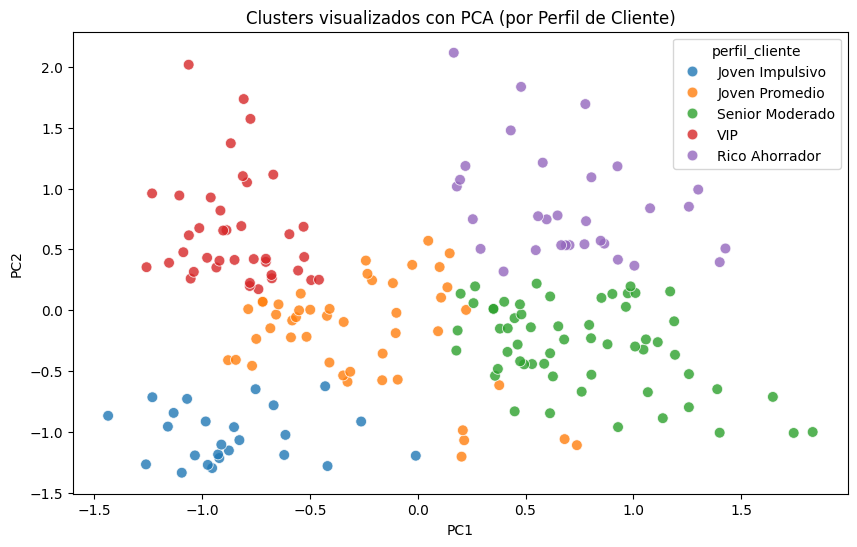

In [168]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Nos aseguramos de usar las 3 variables para el PCA
vars_3d = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X_scaled_3d = RobustScaler().fit_transform(df_2[vars_3d])

# 2. Calculamos PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_3d)

# 3. Visualizamos usando 'perfil_cliente'
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_2["perfil_cliente"],  # <--- Aquí usamos los nombres (texto)
    palette="tab10",
    s=60,
    alpha=0.8
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualizados con PCA (por Perfil de Cliente)")
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

* ¿Ves clústeres claramente separados en 3D o hay solapamientos?

  La variable Edad elimina los solapamientos que existían en 2D, situando a cada grupo en su propia zona diferenciada del espacio.

* ¿Qué dos clústeres te parecen más parecidos visualmente?

  - El Senior Moderado (0) y el Joven Promedio (3). Son casi idénticos en Ingresos y Gasto, pero se separan completamente por la Edad.

  - Y el Joven Impulsivo y el Joven Promedio (3). Son idénticos en Edad (ambos en la veintena), pero se separan completamente por el Gasto.


<br>

---

### 8. Estabilidad y reproducibilidad del clustering

K-means depende de una inicialización aleatoria de los centroides iniciales. En este apartado se va a comprobar si el clustering obtenido es estable, es decir, si produce resultados similares cuando se repite el entrenamiento con distintas inicializaciones.

<div style="background-color:green;color:white">

<br>

1. Entrena el modelo K-means varias veces usando el mismo valor de **K**, pero cambiando la semilla (*random_state*).
2. Compara las asignaciones de clúster obtenidas en cada ejecución.
3. Utiliza el **Adjusted Rand Index (ARI)** para medir la similitud entre los distintos resultados.
4. Representa gráficamente los valores de ARI obtenidos.
5. Interpreta el resultado.

<br>

In [181]:
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Configuración
K_OPT = 5
labels_list = []

for seed in range(10):
    km = KMeans(n_clusters=K_OPT, n_init=5, random_state=seed)
    labels_list.append(km.fit_predict(X_scaled))

# ARI respecto a la ejecución con seed=0
aris = [adjusted_rand_score(labels_list[0], lbl) for lbl in labels_list[1:]]
display(pd.Series(aris, name="ARI_vs_seed0"))


,ARI_vs_seed0
0,0.988997
1,1.000000
2,0.988997
3,1.000000
4,0.988997
5,0.988997
6,1.000000
7,1.000000
8,1.000000


Este análisis permite comprobar si el clustering es reproducible frente a distintas inicializaciones. Valores altos de ARI indican que el modelo obtiene agrupaciones similares de forma consistente, lo que refuerza la fiabilidad del resultado.

<div style="background-color:green;color:white">

<br>

* Visualizalo gráficamente

<br>


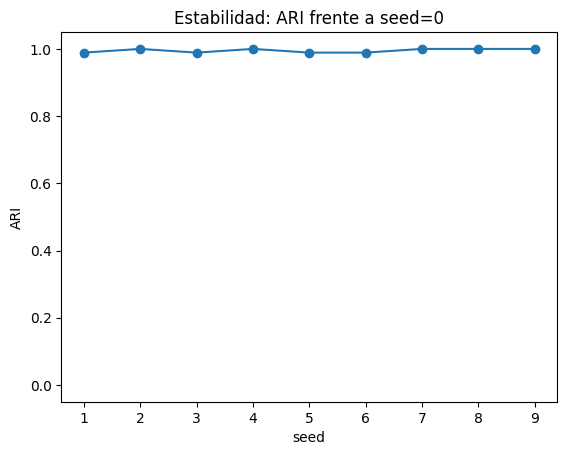

In [182]:
# 3. Visualización
plt.plot(range(1, 10), aris, marker="o")
plt.title("Estabilidad: ARI frente a seed=0")
plt.xlabel("seed")
plt.ylabel("ARI")
plt.ylim(-0.05, 1.05)
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

* ¿Los valores de ARI son altos o bajos?

Son extremadamente altos.

* ¿Qué indica esto sobre la estabilidad del clustering?

Indica una estabilidad casi absoluta.

* ¿Podrías confiar en este resultado si el modelo se vuelve a entrenar en otro momento?

Al haber eliminado la aleatoriedad de la inicialización (gracias a cambiar n_init="auto" por n_init=5), el resultado es robusto y reproducible.

Si puedo confiar en que no cambien el resultado.

<br>

---

### 9. Conclusión breve

<div style="background-color:green;color:white">

<br>

Redacta un breve texto (5–8 líneas) explicando:

* Qué clusters has encontrado

Se han identificado 5 perfiles distintos: VIPs (alto valor), Ricos Ahorradores (potencial desaprovechado), Jóvenes Impulsivos y dos grupos de consumo medio (Joven Promedio y Senior Moderado).

* Qué variables han sido más relevantes

La Edad ha sido la variable crítica; sin ella, los grupos de consumo medio se solapaban y eran indistinguibles, mientras que Ingresos y Gasto definieron los extremos.

* Qué limitaciones tiene K-means en este problema real

 La principal limitación es que K-means asume grupos esféricos y de tamaño similar, forzando una estructura rígida.

<br>